In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
stock_data=pd.read_csv('..\\datasets\\Stock-Price-Forecasting\\stocks.csv')

In [4]:
print(stock_data.head())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


In [5]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

In [6]:
stock_data.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
stock_data['Ticker'].value_counts()

Ticker
AAPL    62
MSFT    62
NFLX    62
GOOG    62
Name: count, dtype: int64

In [8]:
tickers=stock_data['Ticker'].unique()

In [9]:
time_range=stock_data['Date'].min(),stock_data['Date'].max()
print(time_range)

(Timestamp('2023-02-07 00:00:00'), Timestamp('2023-05-05 00:00:00'))


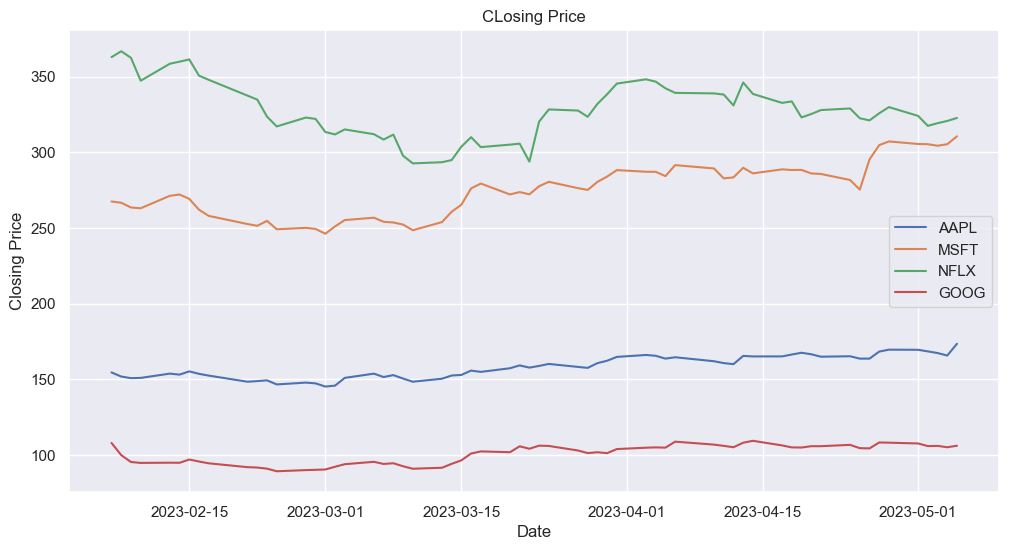

In [10]:
fig,ax=plt.subplots(figsize=(12,6))
for ticker in tickers:
    subset=stock_data[stock_data['Ticker']==ticker]
    ax.plot(subset['Date'],subset['Close'],label=ticker)
ax.set_title('CLosing Price')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend()
plt.show()

In [14]:
stock_data.groupby('Ticker')['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,158.240645,7.360485,145.309998,152.077499,158.055000,165.162506,173.570007
GOOG,62.0,100.631532,6.279464,89.349998,94.702501,102.759998,105.962503,109.459999
MSFT,62.0,275.039839,17.676231,246.270004,258.742500,275.810013,287.217506,310.649994
NFLX,62.0,327.614677,18.554419,292.760010,315.672493,325.600006,338.899994,366.829987


In [22]:
pivot_data=stock_data.pivot(index='Date',columns='Ticker',values='Close')

In [57]:
#stock_data.set_index('Date',inplace=True)
temp=pd.DataFrame()
temp.index=stock_data.index
temp['AAPL']=stock_data[stock_data['Ticker']=='AAPL']['Close']
for stock in stock_data.Ticker.unique():
    temp[stock]=stock_data[stock_data['Ticker']==stock]['Close']

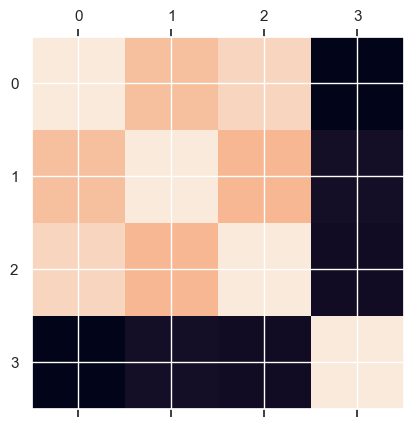

In [83]:
c=pivot_data.corr()
plt.matshow(c)
plt.show()

In [78]:
c.style.background_gradient(cmap='BrBG',axis=None)

Ticker,AAPL,GOOG,MSFT,NFLX
Ticker,,,,
AAPL,1.000000,0.901662,0.953037,0.154418
GOOG,0.901662,1.000000,0.884527,0.201046
MSFT,0.953037,0.884527,1.000000,0.191273
NFLX,0.154418,0.201046,0.191273,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

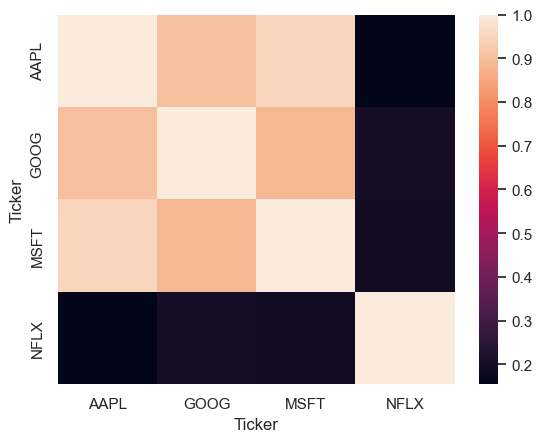

In [65]:
sns.heatmap(c)

In [31]:
import pandas_datareader.data as web
import os

os.environ["ALPHAVANTAGE_API_KEY"] ='YZYMIEX8LD5D9PUX'
start_date=pd.to_datetime('2022-10-1')
end_date=pd.to_datetime('today')

df_apple=pandas_datareader.av.time_series.AVTimeSeriesReader(symbols='AAPL',function='TIME_SERIES_DAILY', start=start_date,end=end_date, api_key=os.getenv('ALPHAVANTAGE_API_KEY')).read()
df_apple['stock']='AAPL'
df_google=pandas_datareader.av.time_series.AVTimeSeriesReader(symbols='GOOG',function='TIME_SERIES_DAILY', start=start_date,end=end_date, api_key=os.getenv('ALPHAVANTAGE_API_KEY')).read()
df_google['stock']='GOOG'
df_tesla=pandas_datareader.av.time_series.AVTimeSeriesReader(symbols='TSLA',function='TIME_SERIES_DAILY', start=start_date,end=end_date, api_key=os.getenv('ALPHAVANTAGE_API_KEY')).read()
df_tesla['stock']='TSLA'
df_ibm=pandas_datareader.av.time_series.AVTimeSeriesReader(symbols='IBM',function='TIME_SERIES_DAILY', start=start_date,end=end_date, api_key=os.getenv('ALPHAVANTAGE_API_KEY')).read()
df_ibm['stock']='IBM'
df_msft=pandas_datareader.av.time_series.AVTimeSeriesReader(symbols='MSFT',function='TIME_SERIES_DAILY', start=start_date,end=end_date, api_key=os.getenv('ALPHAVANTAGE_API_KEY')).read()
df_msft['stock']='MSFT'
df_nflx=pandas_datareader.av.time_series.AVTimeSeriesReader(symbols='NFLX',function='TIME_SERIES_DAILY', start=start_date,end=end_date, api_key=os.getenv('ALPHAVANTAGE_API_KEY')).read()
df_nflx['stock']='NFLX'

df=pd.concat([df_apple,df_google,df_tesla,df_ibm,df_msft,df_nflx])
df.index=pd.to_datetime(df.index)

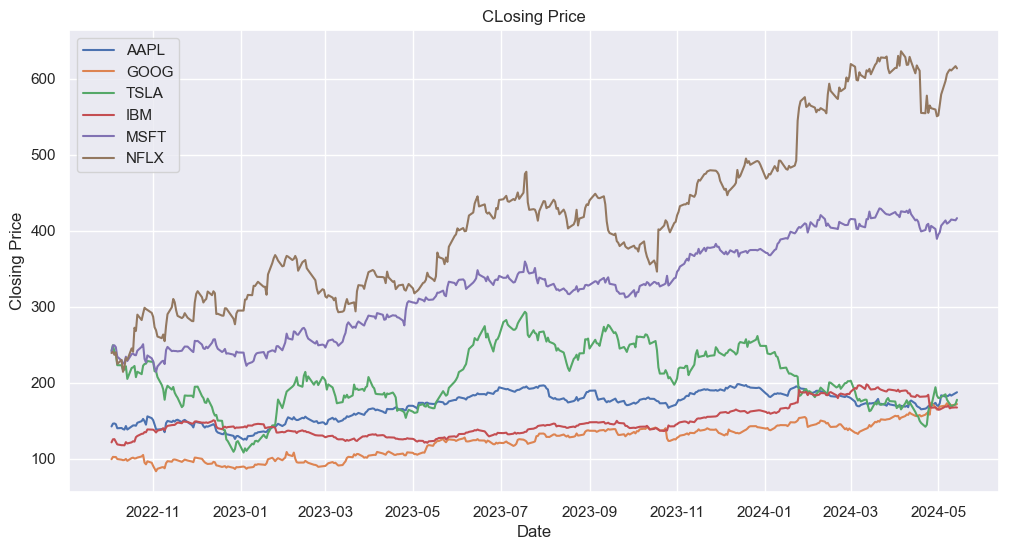

In [32]:
tickers=df['stock'].unique()
fig,ax=plt.subplots(figsize=(12,6))
for ticker in tickers:
    subset=df[df['stock']==ticker]
    ax.plot(subset['close'],label=ticker)
ax.set_title('CLosing Price')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend()
plt.show()